In [1]:

from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd

import pandas as pd 

from tqdm import tqdm
import math


from scipy.stats import norm
from scipy.stats import multivariate_normal

In [58]:
class HMC():
    def __init__(self):
        pass


        
    def _momentum(self, p):
        """
        運動エネルギーは 正規乱数のlog(= -0.5 * p**2)にマイナスをくっつけたもの
        """
        return 0.5 * np.sum(p**2)

    def _hamiltonian(self,x,p):
        return self._h(x) + self._momentum(p)
    
    def _h(self,x):
        """
        こいつがポテンシャルエネルギー的なもの。

        確率密度のlogをとり、マイナスをつける。関係のあるものだけにする
        """
        
        # 分布
        # (- 1 / (2* (1-0.9**2))*((_x**2/1.15**2 + 1.15**2 * (_y-0.5 * _x**2/1.15**2 - 0.5* 1.15**2)**2 - 2* 0.9 * (_y-0.5* _x**2/1.15**2- 0.5 * 1.15**2))))


        _x,_y = x
        
        return -1 * (- 1 / (2* (1-0.9**2))*((_x**2/1.15**2 + 1.15**2 * (_y-0.5 * _x**2/1.15**2 - 0.5* 1.15**2)**2 - 2* 0.9 * (_y-0.5* _x**2/1.15**2- 0.5 * 1.15**2))))


    
    def _delta_h(self,x):
        
        _x,_y = x
        # _xに関する微分
        # x (1.98985 x^2 + 11.0417) - 5.26316 x y
        _h_x = _x *(1.98985 *_x**2 + 11.0417) - 5.26316* _x * _y

        # _yに関する微分
        # -2.63158 (x^2 - 2.645 y + 3.54901)
        _h_y = -2.63158 *(_x**2 - 2.645 *_y + 3.54901)


        return  np.array(_h_x,_h_y)


    def _LeapFrog(self, x,p, eta, L, stlide=1):
        for _ in range(L):
            p = p - 0.5*eta* self._delta_h(x)
            x = x + eta * p
            p = p - 0.5*eta* self._delta_h(x)
        return x,p
    
    def _sampler(self,T,L,eta):
        
        
        x = np.array([0,1])
        p = rd.normal(loc=0,scale=1,size =2)
        prev_hamiltonian = self._hamiltonian(x,p)
        sim_result = [[x,p,prev_hamiltonian, True]]
        
        sample_1 = []
        sample_2 = []
        for t in range(T):
            prev_x,prev_p,prev_hamiltonian = x,p,self._hamiltonian(x,p)
            x,p = self._LeapFrog(x,p,eta,L= L)
            H = self._hamiltonian(x,p)
            # 本当は、np.exp(-H)/np.exp(-prev_hamiltonian)
            # 上を展開して整理した
            r = np.exp(prev_hamiltonian-H)
            if  rd.uniform() < r:
                sample_1.append(x[0])
                sample_2.append(x[1])
                sim_result.append([ x,p,self._hamiltonian(x,p), True])
            else:
                sim_result.append([x,p,self._hamiltonian(x,p), False])
                x = prev_x
                sample_1.append(x[0])
                sample_2.append(x[1])
            p = rd.normal(loc=0,scale=1,size =2) 
        print("Accept_rate: {:.6f}".format(sum(np.array(sim_result)[:,3])/len(np.array(sim_result)[:,3])))
        
        return sample_1, sample_2

    def Sampling(self,T=10000,L = 100,eta = 0.01,chain =2,burn_in_rate = 0.1):
        return self._sampler(T,L,eta)

In [79]:
eta = 0.02

L = 400

In [80]:
instance = HMC()

In [81]:
result1,result2 = instance.Sampling(T=10000,L = L,eta = eta)

Accept_rate: 0.027197


(array([  14.,    0.,    0.,    0.,   10.,    0.,    0.,    0.,    0.,
           0.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    9.,    0.,    9.,    3.,    1.,    0.,    4.,
           8.,   34.,    5.,    3.,   72.,   51.,    8.,  391.,   52.,
          92.,   35.,  361.,  157.,  232.,  243.,  435.,  126.,  597.,
         301.,  484.,  385.,  394.,  615.,  428.,  434.,  383.,  414.,
         319.,  246.,  210.,  419.,  162.,  218.,  135.,   75.,  124.,
         219.,   71.,  231.,   43.,   49.,   46.,    0.,   24.,  236.,
           0.,  252.,    0.,    7.,    0.,    0.,    7.,   15.]),
 array([-2.13581887, -2.09072302, -2.04562717, -2.00053131, -1.95543546,
        -1.91033961, -1.86524375, -1.8201479 , -1.77505205, -1.72995619,
        -1.68486034, -1.63976449, -1.59466863, -1.54957278, -1.50447693,
        -1.45938107, -1.41428522, -1.36918937, -1.32409351, -1.27899766,
        -1.23390181, -1.18880595, -1.1437101 , -1.09861425, -1.05351839,
 

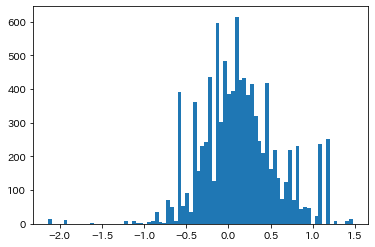

In [73]:
plt.hist(np.array(result1[100:]),bins= 80)

(array([   1.,    5.,    0.,   10.,    1.,   18.,   29.,   39.,   39.,
          95.,   73.,  128.,  219.,  146.,  339.,  386.,  520.,  275.,
         301.,  515.,  441.,  511.,  789.,  572.,  511.,  315.,  563.,
         298.,  229.,  309.,  232.,  644.,  347.,  131.,  370.,  245.,
          75.,   24.,   31.,   32.,   37.,    0.,   11.,    0.,   12.,
           0.,   30.,    0.,    0.,    2.]),
 array([ -2.82199920e-03,   5.81084013e-02,   1.19038802e-01,
          1.79969202e-01,   2.40899603e-01,   3.01830003e-01,
          3.62760404e-01,   4.23690804e-01,   4.84621205e-01,
          5.45551605e-01,   6.06482006e-01,   6.67412406e-01,
          7.28342807e-01,   7.89273207e-01,   8.50203608e-01,
          9.11134009e-01,   9.72064409e-01,   1.03299481e+00,
          1.09392521e+00,   1.15485561e+00,   1.21578601e+00,
          1.27671641e+00,   1.33764681e+00,   1.39857721e+00,
          1.45950761e+00,   1.52043801e+00,   1.58136841e+00,
          1.64229881e+00,   1.70322922e+00

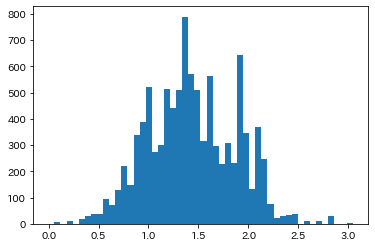

In [74]:
plt.hist(np.array(result2[100:]),bins= 50)

In [75]:
np.array(result1[100:])

array([ 0.11842335,  0.11842335,  0.11842335, ...,  0.46729515,
        0.46729515,  0.46729515])

In [76]:
np.array(result2[100:])

array([ 1.60908916,  1.60908916,  1.60908916, ...,  1.5881637 ,
        1.5881637 ,  1.5881637 ])

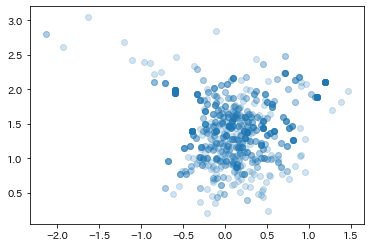

In [77]:
plt.figure()
ax = plt.gca()

ax.scatter(result1[::10],result2[::10], alpha = 0.2)

# Draw the plot
plt.draw()

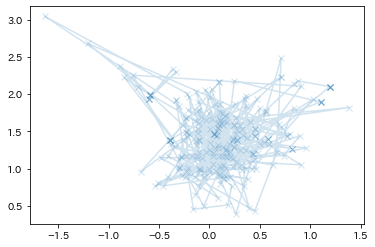

In [78]:
plt.figure()
ax = plt.gca()

ax.plot(result1[::40],result2[::40], '-x',alpha = 0.2)

# Draw the plot
plt.draw()